# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.154609e+01     1.574281e+01
 * time: 0.0037147998809814453
     1     6.410182e+01     1.098860e+01
 * time: 0.010770797729492188
     2     5.708466e+01     1.534434e+01
 * time: 0.026237964630126953
     3     4.144418e+01     9.859349e+00
 * time: 0.04638385772705078
     4     2.998328e+01     7.436415e+00
 * time: 0.06569385528564453
     5     2.181548e+01     4.983404e+00
 * time: 0.08255481719970703
     6     1.685937e+01     4.990184e+00
 * time: 0.16277098655700684
     7     8.960602e+00     3.692264e+00
 * time: 0.1785907745361328
     8     7.701671e+00     3.472916e+00
 * time: 0.19315576553344727
     9     6.926402e+00     1.580848e+00
 * time: 0.20739483833312988
    10     6.356969e+00     3.131129e+00
 * time: 0.21865391731262207
    11     6.042148e+00     1.921472e+00
 * time: 0.22984695434570312
    12     5.938155e+00     1.185646e+00
 * time: 0.24120783805847168
    13     5.850636e+00     1.501375e+00
 * ti

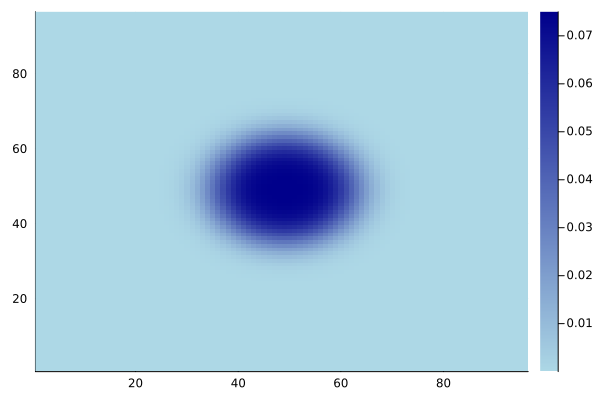

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)